Reading Input files
====

In [1]:
import os
import numpy as np
import rasterio
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
os.getcwd()

'/home/drugo/PythonScript/LaiReader'

In [3]:
os.chdir('/home/drugo/Sim/kriging_simulations/kriging_simulations/output')

In [4]:
os.listdir()

['2_SWRB_Raster',
 'hack_cut.prj',
 'c_tangenziale.prj',
 'drain_dir.asc',
 'DEM_LORES2.asc.aux.xml',
 'fake1.tif',
 '1_extract_network',
 'kriging_interpolated_20080722_1500.asc.aux.xml',
 'LwrbUpWellingRaster.prj',
 'EV_T.csv',
 'distances_WIND.csv',
 'EV_H.csv',
 'SWRB_raster.asc',
 'net_cut.shp',
 'kriging_interpolated_RH_local_20080722_1500.prj',
 'kriging_interpolated_HR_20080722_1500.asc',
 'tc9.prj',
 'c_planare.prj',
 'Krigings_raster',
 'net_cut.prj',
 'rain_maggio',
 'TV_giugno_bessel_RHMEAN.csv',
 'kriging_interpolated_HR_20080722_1500.prj',
 'Wind.asc',
 'c_planare.asc',
 'DEM_LORES3.prj',
 'temperature',
 'c_longitudinale.prj',
 'net_cut.shx',
 'mybasin.asc',
 'rescaled_distance.asc',
 'ET_SO_raster',
 'flow_dir.prj',
 'kriging_interpolated_HRlocal_20080722_1500.asc.aux.xml',
 'tc3.asc',
 'EV_RH.csv',
 'top_index.prj',
 'kriging_interpolated_temp_20080722_1500.prj',
 'LwrbDownWellingRaster.prj',
 'Tca.prj',
 'ET_raster.prj',
 'fake2.prj',
 'net_number_cut.asc',
 'SWRB_ras

In [6]:
with rasterio.open("ET_raster.asc") as src:
    lai=src.read(1)

In [7]:
src

<closed RasterReader name='ET_raster.asc' mode='r'>

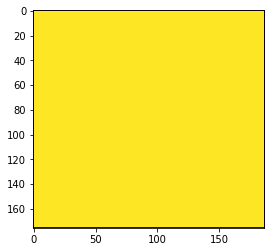

In [8]:
plt.imshow(lai)

In [9]:
lai.view()

array([[-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03],
       [-9.9990000e+03,  7.9241134e-03,  5.8819866e-03, ...,
         3.6842339e-02,  1.3610412e-02, -9.9990000e+03],
       [-9.9990000e+03,  9.3043130e-03,  7.8313900e-03, ...,
         3.4106482e-02,  4.4814795e-02, -9.9990000e+03],
       ...,
       [-9.9990000e+03,  5.9449688e-02,  7.5754806e-02, ...,
         1.9077232e-01,  1.2953533e-01, -9.9990000e+03],
       [-9.9990000e+03,  4.6997834e-02,  5.2854054e-02, ...,
         1.3805367e-01,  1.0962498e-01, -9.9990000e+03],
       [-9.9990000e+03, -9.9990000e+03, -9.9990000e+03, ...,
        -9.9990000e+03, -9.9990000e+03, -9.9990000e+03]], dtype=float32)

In [10]:
lai = np.array(lai, dtype='f')

In [11]:
amin=min(lai[lai > 0])
amin

0.0003799094

In [12]:
lai = lai/10;
lai

array([[-9.9990002e+02, -9.9990002e+02, -9.9990002e+02, ...,
        -9.9990002e+02, -9.9990002e+02, -9.9990002e+02],
       [-9.9990002e+02,  7.9241133e-04,  5.8819866e-04, ...,
         3.6842339e-03,  1.3610412e-03, -9.9990002e+02],
       [-9.9990002e+02,  9.3043130e-04,  7.8313902e-04, ...,
         3.4106481e-03,  4.4814795e-03, -9.9990002e+02],
       ...,
       [-9.9990002e+02,  5.9449687e-03,  7.5754807e-03, ...,
         1.9077232e-02,  1.2953533e-02, -9.9990002e+02],
       [-9.9990002e+02,  4.6997834e-03,  5.2854056e-03, ...,
         1.3805367e-02,  1.0962498e-02, -9.9990002e+02],
       [-9.9990002e+02, -9.9990002e+02, -9.9990002e+02, ...,
        -9.9990002e+02, -9.9990002e+02, -9.9990002e+02]], dtype=float32)

In [12]:
lai[lai > 11]='NAN'
lai

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

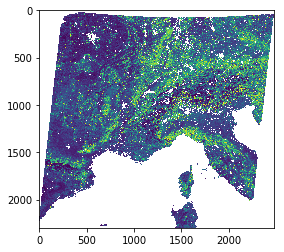

In [13]:
plt.imshow(lai)

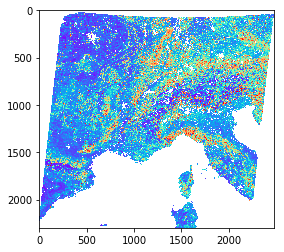

In [14]:
fig,ax = plt.subplots()
ax.imshow(lai,cmap="rainbow")
ax.set_aspect(1)

In [15]:
flai=lai.flatten()
cflai=pd.DataFrame(flai[~np.isnan(flai)])

In [16]:
cflai.describe()

,0
count,3.461304e+06
mean,2.174068e+00
std,1.584722e+00
min,0.000000e+00
25%,1.000000e+00
50%,1.600000e+00
75%,2.800000e+00
max,7.000000e+00


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe898df76a0>]],
      dtype=object)

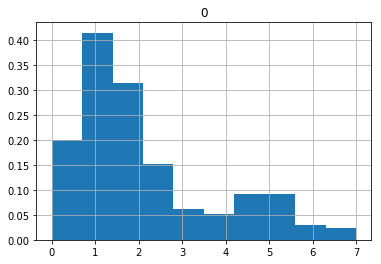

In [17]:
cflai.hist(label="Distribution of leaf area index", normed=True)

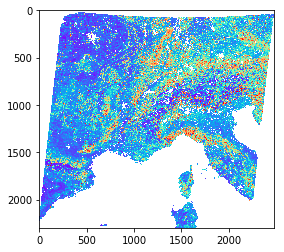

In [18]:
fig,ax = plt.subplots()
ax.imshow(lai,cmap="rainbow")
ax.set_aspect(1)

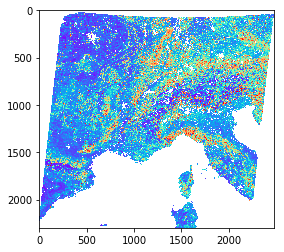

In [19]:
fig

In [20]:
fig.savefig('test.tif')

In [21]:
lai

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [33]:
from PIL import Image
import gdal, ogr, os, osr

In [23]:
data = lai
lai

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [24]:
im = Image.fromarray(data)
im.save('testPIL.tif')

In [25]:
def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(32632)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

In [34]:
def main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    reversed_arr = lai[::-1] # reverse array so the tif looks like the array
    array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr) # convert array to raster

In [40]:
if __name__ == "__main__":
    rasterOrigin = (-268585,4466683)
    pixelWidth = 1200
    pixelHeight = 1200
    newRasterfn = 'test.tif'
    array = np.array([[ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                      [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                      [ 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
                      [ 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
                      [ 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
                      [ 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1],
                      [ 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
                      [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                      [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                      [ 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])


In [41]:
main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,lai)

In [59]:
def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array,format='GTiff'):

    bands = array.shape[0]
    rows = array.shape[1]
    cols = array.shape[2]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]
    driver = gdal.GetDriverByName(format)
    #Here is where I assign three bands to the raster with int 3
    options = ['PHOTOMETRIC=RGB', 'PROFILE=GeoTIFF']
    outRaster = driver.Create(newRasterfn, cols, rows, bands, gdal.GDT_UInt16, options=options)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    #outband = outRaster.GetRasterBand(1)
    #outband.WriteArray(array)
    for band in range(bands):
        outRaster.GetRasterBand(band+1).WriteArray( array[band, :, :] )

    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(6962)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())

    return outRaster

HdfToRaster.py                                          test.tif
Lai500.tif                                              Untitled1.ipynb
MCD15A3H.A2010201.h18v04.006.2015209130457.hdf          Untitled2.ipynb
MCD15A3H.A2010201.h18v04.006.2015209130457.hdf.aux.xml  Untitled3.ipynb
modifyHdf.ipynb                                         Untitled4.ipynb
ReadingWithRasterio.ipynb                               Untitled.ipynb
test2.tif


In [60]:
gdalinfo Lai500.tif

SyntaxError: invalid syntax (<ipython-input-60-67147c7d6dac>, line 1)

In [61]:
import gdaltools


ModuleNotFoundError: No module named 'gdaltools'